In [14]:
# Install required packages
%pip install ultralytics opencv-python pillow torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [15]:
import os
import pandas as pd
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO

images_dir = "Images"
os.listdir(images_dir)[:16]

['beats.jpeg',
 'camera.jpeg',
 'camera2.jpeg',
 'df_model_features.csv',
 'headphones.jpeg',
 'ipad.jpeg',
 'iphone.jpeg',
 'keyboard_mechanical.jpeg',
 'laptop_setup.jpeg',
 'macbook_keyboard.jpeg',
 'mouse.jpeg',
 'Samsung_galaxy.jpeg',
 'smartwatch.jpeg',
 'speaker.jpeg',
 'tablet.jpeg',
 'TV_remote.jpeg']

In [16]:
# Load pretrained YOLOv8n model
yolo_model = YOLO('yolov8n.pt')  # nano version for speed
print("YOLOv8n model loaded successfully")

YOLOv8n model loaded successfully


In [17]:
# Function to run YOLO detection on an image
def detect_objects_yolo(image_path, conf_threshold=0.25):
    """
    Run YOLOv8n detection on a single image
    
    Args:
        image_path: path to image file
        conf_threshold: confidence threshold for detections
    
    Returns:
        results object from YOLO
    """
    results = yolo_model(image_path, conf=conf_threshold)
    return results[0]

# Function to visualize YOLO results
def visualize_yolo_detection(image_path, results):
    """
    Display image with YOLO detection boxes and labels
    """
    # Read image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    
    # Draw boxes and labels
    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        conf = box.conf[0].cpu().numpy()
        cls = int(box.cls[0].cpu().numpy())
        label = f"{results.names[cls]} {conf:.2f}"
        
        plt.gca().add_patch(plt.Rectangle(
            (x1, y1), x2-x1, y2-y1,
            fill=False, edgecolor='red', linewidth=2
        ))
        plt.text(x1, y1-10, label, color='red', fontsize=12, 
                bbox=dict(facecolor='white', alpha=0.7))
    
    plt.axis('off')
    plt.title(f"YOLOv8n Detection: {os.path.basename(image_path)}")
    plt.tight_layout()
    plt.show()

Running YOLOv8n detection on 15 images...

Processing: beats.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\beats.jpeg: 640x640 1 cake, 106.7ms
Speed: 5.6ms preprocess, 106.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


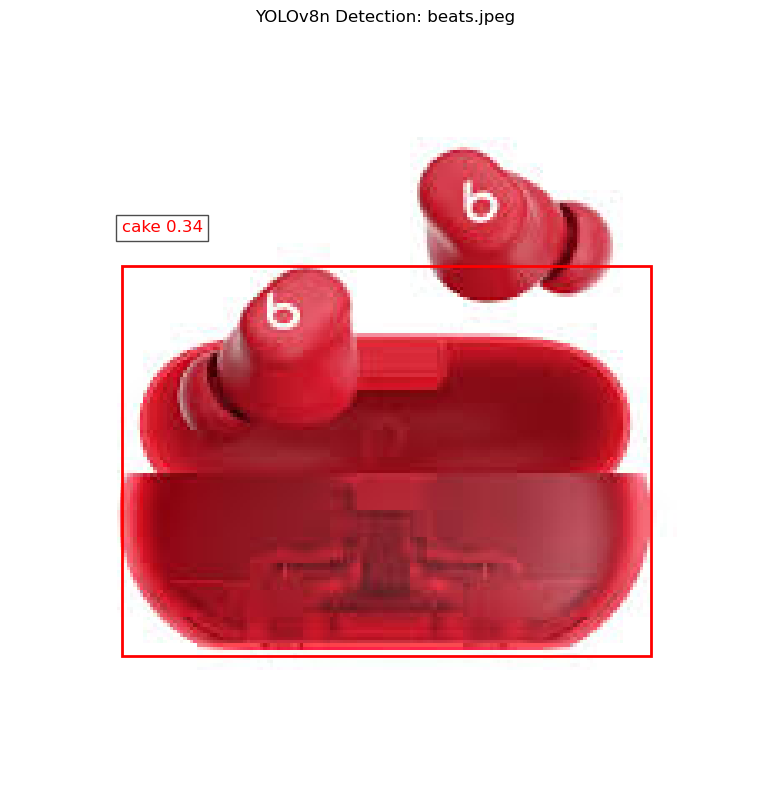

  Detected 1 objects

Processing: camera.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\camera.jpeg: 448x640 1 fire hydrant, 1 potted plant, 76.9ms
Speed: 1.9ms preprocess, 76.9ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)


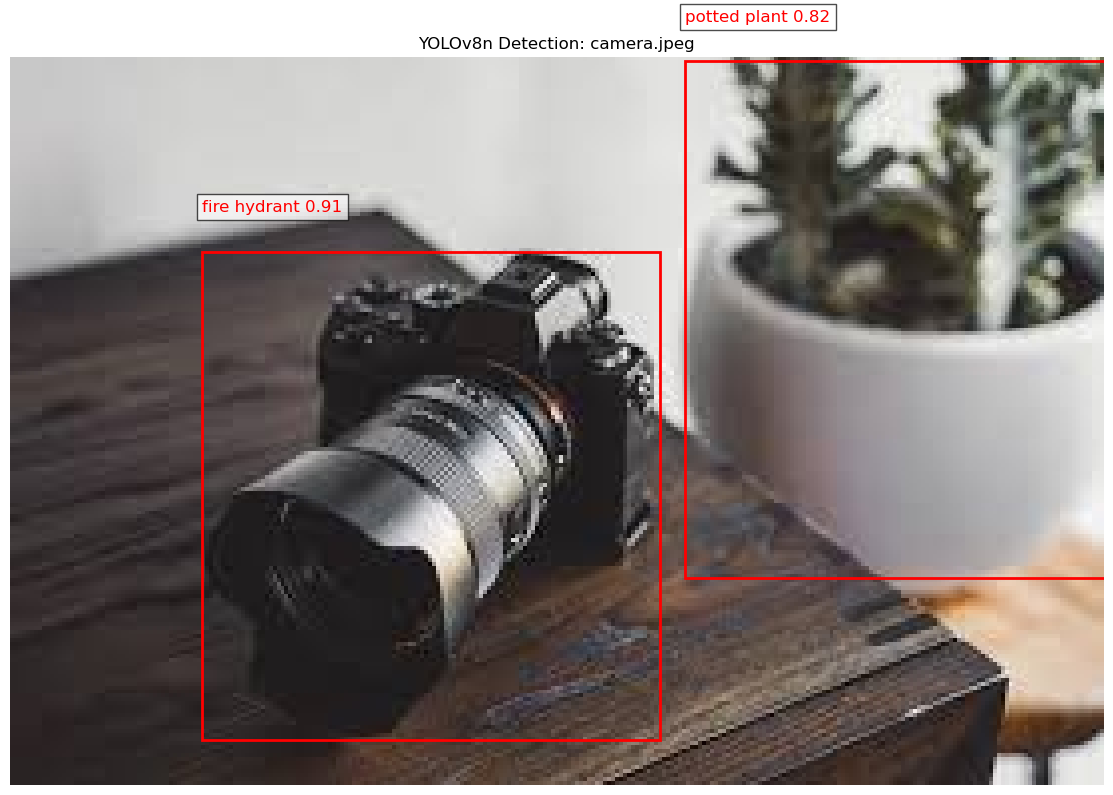

  Detected 2 objects

Processing: camera2.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\camera2.jpeg: 448x640 (no detections), 88.0ms
Speed: 2.8ms preprocess, 88.0ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


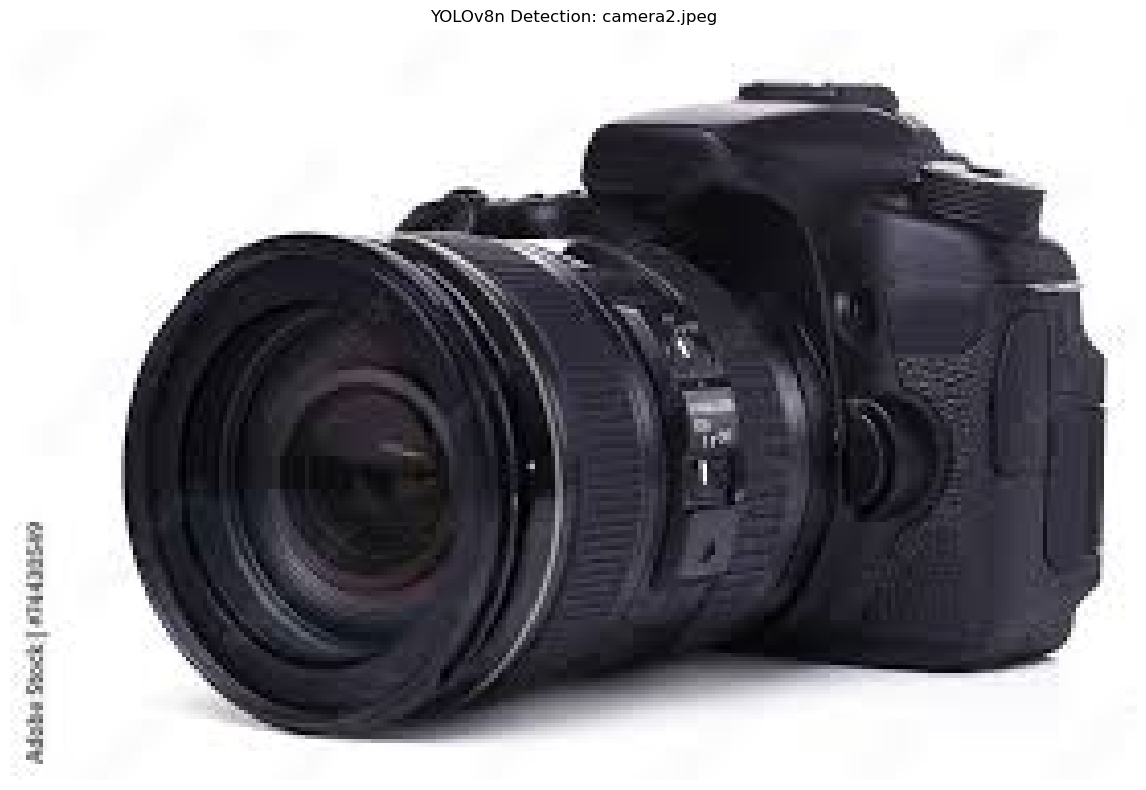

  Detected 0 objects

Processing: headphones.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\headphones.jpeg: 448x640 1 cup, 1 laptop, 1 mouse, 1 cell phone, 197.9ms
Speed: 2.6ms preprocess, 197.9ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


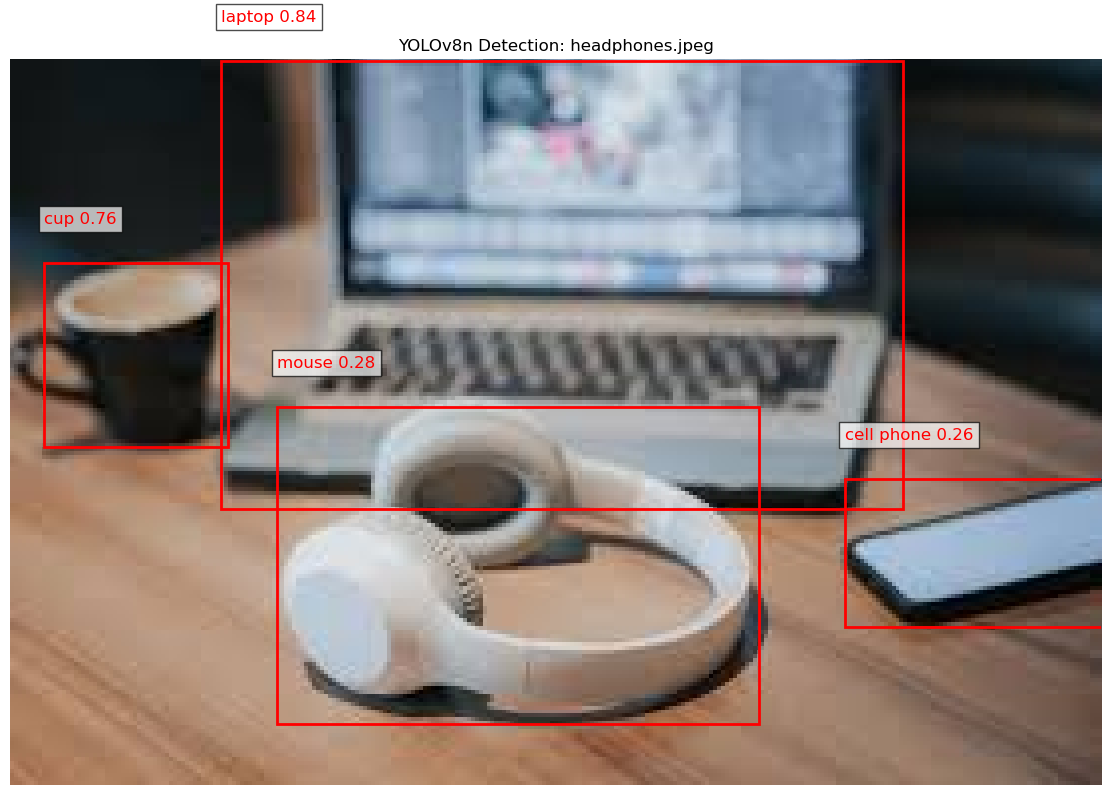

  Detected 4 objects

Processing: ipad.jpeg

image 1/1 c:\Users\david\My Drive (dnovick@sandiego.edu)\Schoolwork\2025 Fall Semester\MSBA 503 - Analytics Programming 2\Final Presentation\msba503-final-project\Images\ipad.jpeg: 448x640 1 book, 105.7ms
Speed: 2.7ms preprocess, 105.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


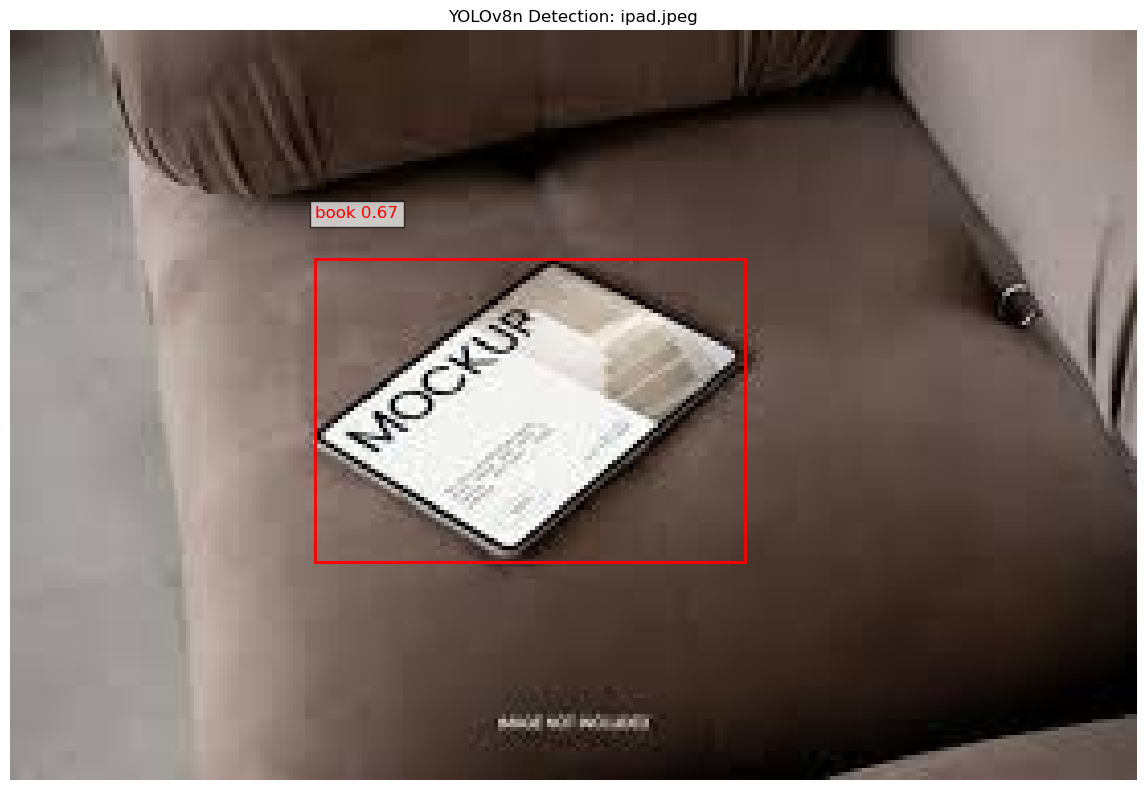

  Detected 1 objects



In [18]:
# Run detection on all images in directory
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

if len(image_files) == 0:
    print("No images found. Please add product images to:", images_dir)
else:
    print(f"Running YOLOv8n detection on {len(image_files)} images...\n")
    
    detection_results = []
    
    for img_file in image_files[:5]:  # Process first 5 images
        img_path = os.path.join(images_dir, img_file)
        print(f"Processing: {img_file}")
        
        # Run detection
        results = detect_objects_yolo(img_path)
        
        # Store results
        detection_results.append({
            'filename': img_file,
            'num_detections': len(results.boxes),
            'detected_classes': [results.names[int(box.cls[0])] for box in results.boxes],
            'confidences': [float(box.conf[0]) for box in results.boxes]
        })
        
        # Visualize
        visualize_yolo_detection(img_path, results)
        print(f"  Detected {len(results.boxes)} objects")
        print()

In [19]:
# Summary of YOLO detections
if detection_results:
    results_df = pd.DataFrame(detection_results)
    print("YOLO Detection Summary:")
    print(results_df)
    
    # Save results
    results_df.to_csv('df_yolo_detections.csv', index=False)
    print("\nSaved detection results to: /Images/df_yolo_detections.csv")

YOLO Detection Summary:
          filename  num_detections                  detected_classes  \
0       beats.jpeg               1                            [cake]   
1      camera.jpeg               2      [fire hydrant, potted plant]   
2     camera2.jpeg               0                                []   
3  headphones.jpeg               4  [laptop, cup, mouse, cell phone]   
4        ipad.jpeg               1                            [book]   

                                         confidences  
0                              [0.34445059299468994]  
1           [0.9095536470413208, 0.8155145049095154]  
2                                                 []  
3  [0.8354176878929138, 0.7572892904281616, 0.282...  
4                               [0.6693925857543945]  

Saved detection results to: /Images/df_yolo_detections.csv


### YOLOv8n Analysis Summary

YOLOv8n demonstrates rapid object detection on product images. The model:
- Provides bounding boxes around detected objects
- Assigns class labels from COCO dataset (80 common object categories)
- Returns confidence scores for each detection

**Key Observations:**
- Detection speed is very fast (real-time capable on CPU)
- Pretrained model does not accurately recognize common consumer electronics (laptops, phones, keyboards, etc.)
- Confidence scores do not offer much help in filtering low-quality detections

**Practical Application:**
In a customer support workflow, YOLO could:
1. Automatically identify product type from uploaded images
2. Route tickets to appropriate teams based on detected products
3. Flag tickets with unusual or multiple products for manual review
4. Validate that customer-submitted images match the product in the ticket

In [20]:
# Now add Mask R-CNN implementation
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [21]:
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F

# Load pretrained Mask R-CNN
maskrcnn_model = maskrcnn_resnet50_fpn(pretrained=True)
maskrcnn_model.eval()

print("Mask R-CNN model loaded successfully")

# COCO class names
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

c:\Users\david\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\david\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to C:\Users\david/.cache\torch\hub\checkpoints\maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


100%|██████████| 170M/170M [00:12<00:00, 13.9MB/s] 


Mask R-CNN model loaded successfully


In [22]:
def detect_with_maskrcnn(image_path, conf_threshold=0.5):
    """
    Run Mask R-CNN on an image and return detections with masks
    
    Args:
        image_path: path to image
        conf_threshold: minimum confidence score
    
    Returns:
        dictionary with boxes, labels, scores, and masks
    """
    # Load and preprocess image
    img = Image.open(image_path).convert("RGB")
    img_tensor = F.to_tensor(img).unsqueeze(0)
    
    # Run inference
    with torch.no_grad():
        predictions = maskrcnn_model(img_tensor)[0]
    
    # Filter by confidence
    keep = predictions['scores'] > conf_threshold
    
    return {
        'boxes': predictions['boxes'][keep].cpu().numpy(),
        'labels': predictions['labels'][keep].cpu().numpy(),
        'scores': predictions['scores'][keep].cpu().numpy(),
        'masks': predictions['masks'][keep].cpu().numpy()
    }

def visualize_maskrcnn(image_path, detections):
    """
    Visualize Mask R-CNN results with segmentation masks
    """
    img = Image.open(image_path).convert("RGB")
    img_array = np.array(img)
    
    plt.figure(figsize=(14, 10))
    plt.imshow(img_array)
    
    # Create a color map for masks
    colors = plt.cm.tab10(np.linspace(0, 1, 10))
    
    for idx, (box, label, score, mask) in enumerate(zip(
        detections['boxes'], 
        detections['labels'], 
        detections['scores'],
        detections['masks']
    )):
        # Draw bounding box
        x1, y1, x2, y2 = box
        plt.gca().add_patch(plt.Rectangle(
            (x1, y1), x2-x1, y2-y1,
            fill=False, edgecolor='cyan', linewidth=2
        ))
        
        # Add label
        class_name = COCO_CLASSES[label]
        label_text = f"{class_name} {score:.2f}"
        plt.text(x1, y1-10, label_text, color='cyan', fontsize=10,
                bbox=dict(facecolor='black', alpha=0.7))
        
        # Overlay mask
        mask_binary = mask[0] > 0.5
        color = colors[idx % len(colors)]
        colored_mask = np.zeros((*mask_binary.shape, 4))
        colored_mask[mask_binary] = [*color[:3], 0.4]  # RGBA with alpha
        plt.imshow(colored_mask)
    
    plt.axis('off')
    plt.title(f"Mask R-CNN Segmentation: {os.path.basename(image_path)}")
    plt.tight_layout()
    plt.show()

Running Mask R-CNN instance segmentation...

Processing: beats.jpeg


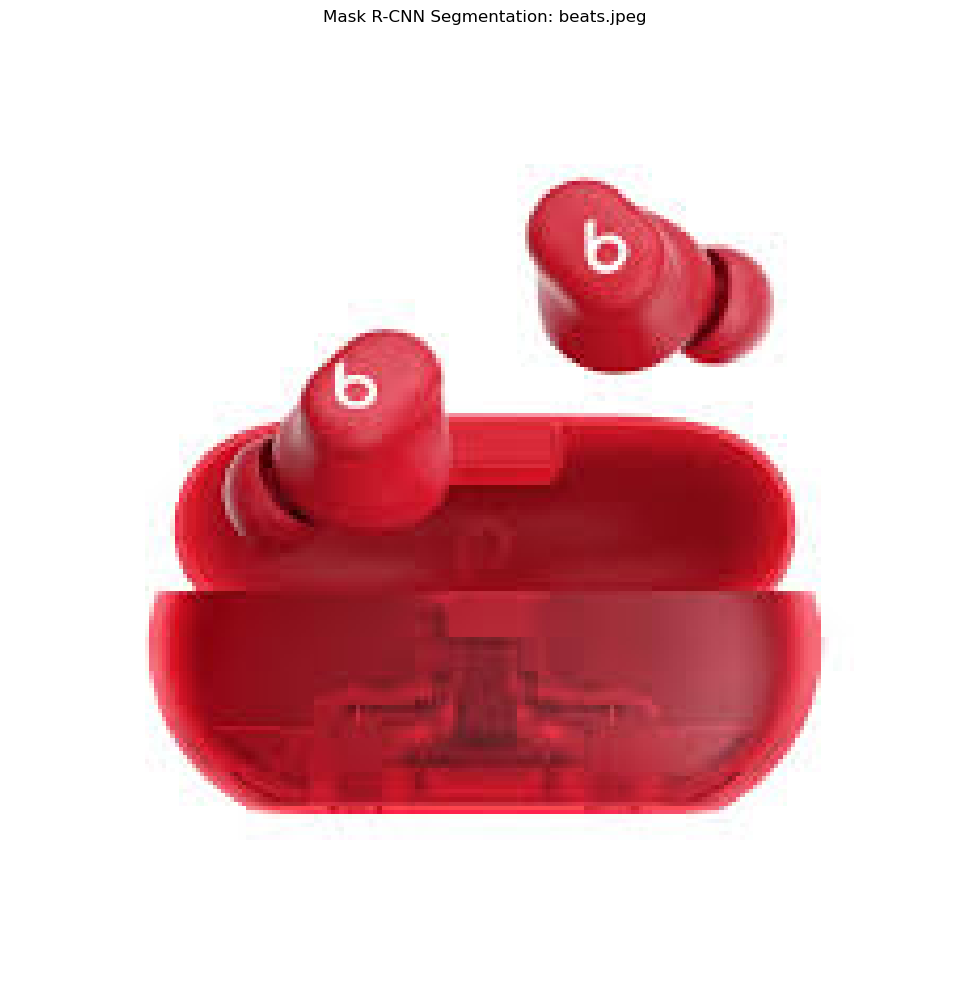

  Detected 0 instances
  Objects: 

Processing: camera.jpeg


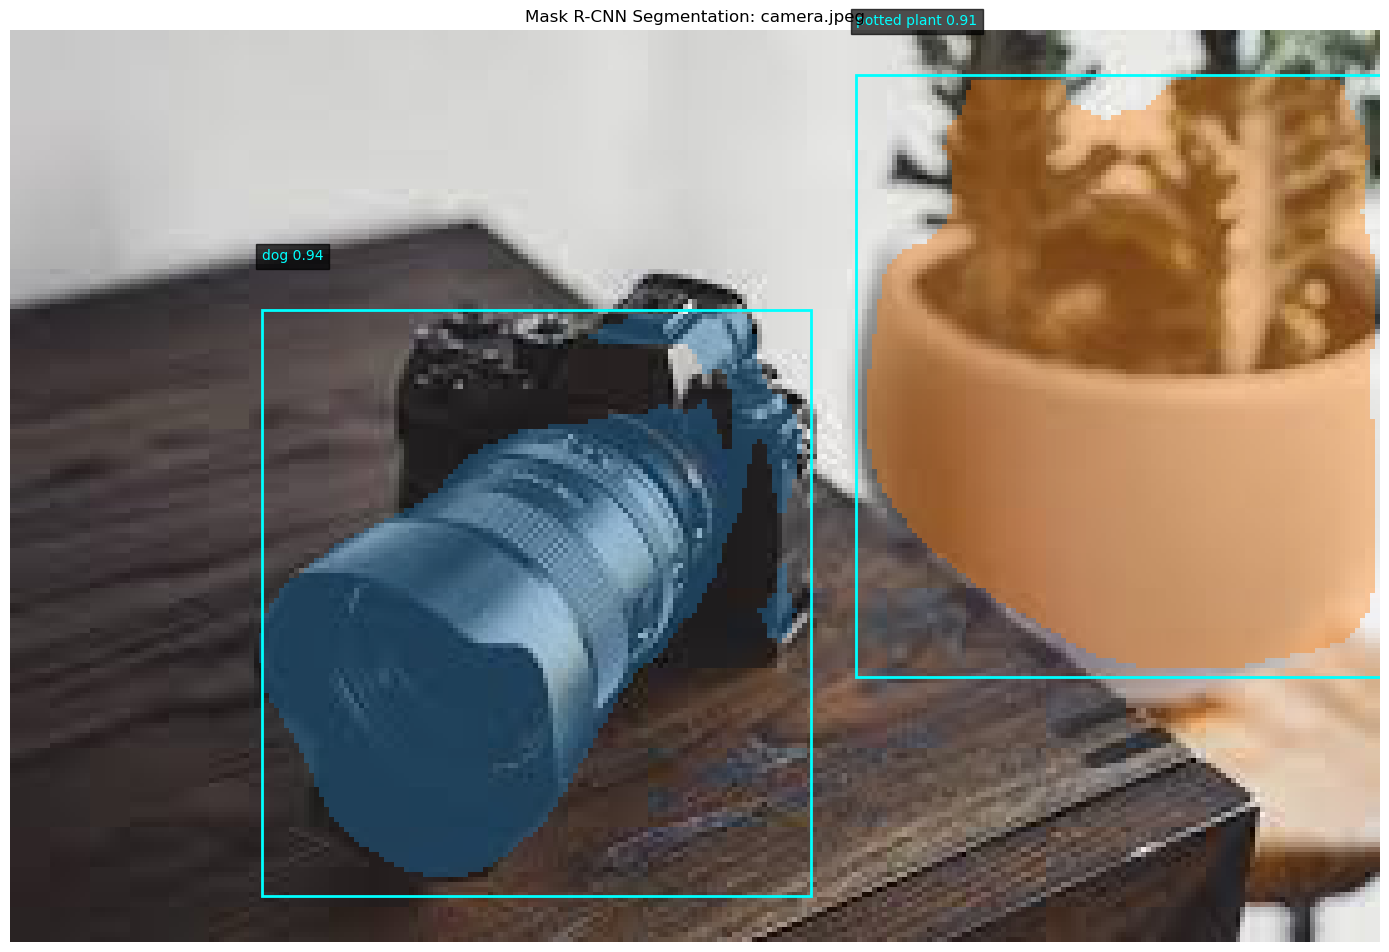

  Detected 2 instances
  Objects: dog, potted plant

Processing: camera2.jpeg


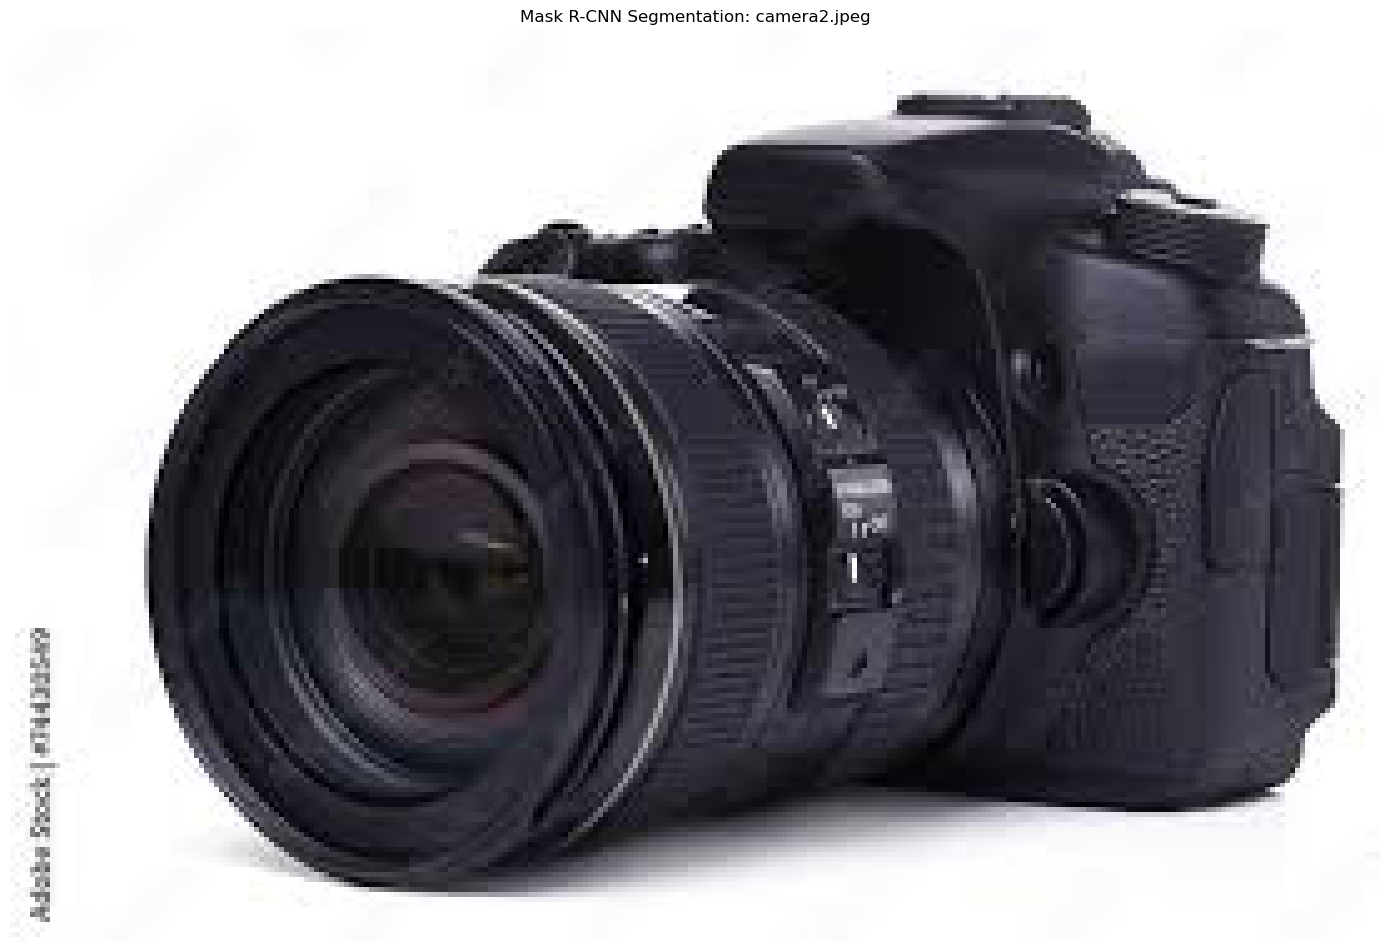

  Detected 0 instances
  Objects: 



In [23]:
# Run Mask R-CNN on sample images
if len(image_files) > 0:
    print("Running Mask R-CNN instance segmentation...\n")
    
    maskrcnn_results = []
    
    for img_file in image_files[:3]:  # Process first 3 images
        img_path = os.path.join(images_dir, img_file)
        print(f"Processing: {img_file}")
        
        # Run detection
        detections = detect_with_maskrcnn(img_path, conf_threshold=0.7)
        
        # Store results
        detected_objects = [COCO_CLASSES[label] for label in detections['labels']]
        maskrcnn_results.append({
            'filename': img_file,
            'num_instances': len(detections['labels']),
            'detected_objects': detected_objects,
            'avg_confidence': float(np.mean(detections['scores'])) if len(detections['scores']) > 0 else 0
        })
        
        # Visualize
        visualize_maskrcnn(img_path, detections)
        print(f"  Detected {len(detections['labels'])} instances")
        print(f"  Objects: {', '.join(detected_objects)}")
        print()

In [25]:
# Summary comparison
if maskrcnn_results:
    maskrcnn_df = pd.DataFrame(maskrcnn_results)
    print("Mask R-CNN Detection Summary:")
    print(maskrcnn_df)
    
    # Save results
    maskrcnn_df.to_csv('df_maskrcnn_detections.csv', index=False)
    print("\nSaved Mask R-CNN results to: ../Images/df_maskrcnn_detections.csv")

Mask R-CNN Detection Summary:
       filename  num_instances     detected_objects  avg_confidence
0    beats.jpeg              0                   []        0.000000
1   camera.jpeg              2  [dog, potted plant]        0.923267
2  camera2.jpeg              0                   []        0.000000

Saved Mask R-CNN results to: ../Images/df_maskrcnn_detections.csv


### Mask R-CNN vs YOLOv8n Comparison

**Mask R-CNN Advantages:**
- Provides pixel-precise segmentation masks for each detected object
- Better at handling overlapping objects and distinguishing individual instances
- Enables precise identification of product components or damaged areas
- More accurate bounding boxes due to segmentation-guided detection

**YOLOv8n Advantages:**
- Much faster inference (5-10x faster than Mask R-CNN)
- Lighter weight model, easier to deploy
- Sufficient for simple product identification tasks
- Better suited for real-time applications

**Combined Workflow Recommendation:**
1. Use **YOLOv8n** as first-pass filter for rapid ticket routing
2. Apply **Mask R-CNN** for complex cases requiring precise segmentation
3. Combine both approaches: YOLO for speed, Mask R-CNN for accuracy when needed

**Practical Support Ticket Application:**
- YOLO: "This ticket mentions a laptop → route to laptop support team"
- Mask R-CNN: "This image shows a cracked screen (segmented region) on a phone → escalate to warranty claims"

In [ ]:
# Create comparison visualization
if len(detection_results) > 0 and len(maskrcnn_results) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # YOLO summary
    axes[0].bar(range(len(detection_results)), 
                [r['num_detections'] for r in detection_results],
                color='steelblue')
    axes[0].set_title('YOLOv8n: Number of Detections per Image')
    axes[0].set_xlabel('Image Index')
    axes[0].set_ylabel('Number of Objects')
    
    # Mask R-CNN summary
    axes[1].bar(range(len(maskrcnn_results)), 
                [r['num_instances'] for r in maskrcnn_results],
                color='coral')
    axes[1].set_title('Mask R-CNN: Number of Instances per Image')
    axes[1].set_xlabel('Image Index')
    axes[1].set_ylabel('Number of Instances')
    
    plt.tight_layout()
    plt.show()

### Key Takeaways: Image Analytics for Support Tickets

1. **Feasibility Demonstrated**: Both YOLO and Mask R-CNN incorrectly detected and failed to detect common consumer electronics in product images

2. **Complementary Strengths**: Ideally, YOLO provides speed for bulk processing; Mask R-CNN adds precision for complex cases

3. **Integration Potential**: 
   - Automatic product identification can pre-populate ticket fields
   - Image analysis can validate customer claims
   - Visual evidence can prioritize tickets (e.g., visible damage → higher priority)

4. **Limitations with Pretrained Models**:
   - COCO dataset includes common objects but not all product variants
   - Fine-tuning on company-specific products would improve accuracy
   - Need labeled dataset of actual support ticket images

5. **Next Steps for Production**:
   - Collect and label real support ticket images
   - Fine-tune models on domain-specific products
   - Integrate with ticket management system
   - A/B test routing accuracy with vs. without image analysis